In [39]:
# importing labraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [40]:
#load the data
movie_title = pd.read_csv('/content/drive/MyDrive/Udemy learning path/ML 8 real world projects/movie recommender/Movie_Id_Titles')
movie_rating = pd.read_csv('/content/drive/MyDrive/Udemy learning path/ML 8 real world projects/movie recommender/u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])
movie_rating.drop(['timestamp'],axis=1,inplace=True)
movie_rating = pd.merge(movie_rating, movie_title, on='item_id')
movie_rating.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [41]:
#visualise data
movie_rating.groupby('title')

In [42]:
movie_rating.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [43]:
rating_mean = movie_rating.groupby('title')['rating'].describe()['mean']
rating_mean.head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: mean, dtype: float64

In [44]:
rating_count= movie_rating.groupby('title')['rating'].describe()['count']
rating_count.head()

title
'Til There Was You (1997)      9.0
1-900 (1994)                   5.0
101 Dalmatians (1996)        109.0
12 Angry Men (1957)          125.0
187 (1997)                    41.0
Name: count, dtype: float64

In [66]:
rating_mean_count = pd.merge(rating_mean,rating_count, on='title')
rating_mean_count = rating_mean_count.reset_index()
rating_mean_count.head()

0      9.0
1      5.0
2    109.0
3    125.0
4     41.0
Name: count, dtype: float64

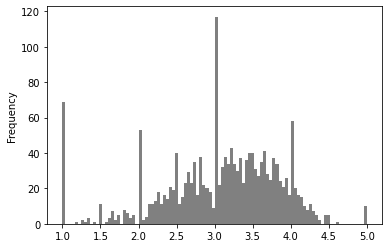

In [46]:
rating_mean_count['mean'].plot(bins=100, kind='hist', color='gray')

In [47]:
rating_mean_count.sort_values('count', ascending=False).head()

,title,mean,count
1398,Star Wars (1977),4.359589,584.0
333,Contact (1997),3.803536,509.0
498,Fargo (1996),4.155512,508.0
1234,Return of the Jedi (1983),4.007890,507.0
860,Liar Liar (1997),3.156701,485.0


In [85]:
userid_title_matrix = movie_rating.pivot_table(index='user_id', columns='title', values='rating')
userid_title_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [86]:
titanic = userid_title_matrix['Titanic (1997)']
titanic_correlation = pd.DataFrame(userid_title_matrix.corrwith(titanic), columns=['Correlation'])
titanic_correlation = pd.merge(titanic_correlation, rating_mean_count, on='title')
titanic_correlation.drop(['mean'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [87]:
titanic_correlation

,title,Correlation,count
0,'Til There Was You (1997),-0.062017,9.0
1,1-900 (1994),NaN,5.0
2,101 Dalmatians (1996),0.120113,109.0
3,12 Angry Men (1957),0.077700,125.0
4,187 (1997),0.315654,41.0
...,...,...,...
1659,Young Guns II (1990),0.317274,44.0
1660,"Young Poisoner's Handbook, The (1995)",0.356783,41.0
1661,Zeus and Roxanne (1997),NaN,6.0
1662,unknown,NaN,9.0


In [88]:
titanic_correlation.dropna(inplace=True)
titanic_correlation

,title,Correlation,count
0,'Til There Was You (1997),-0.062017,9.0
2,101 Dalmatians (1996),0.120113,109.0
3,12 Angry Men (1957),0.077700,125.0
4,187 (1997),0.315654,41.0
5,2 Days in the Valley (1996),0.017295,93.0
...,...,...,...
1655,Year of the Horse (1997),1.000000,7.0
1657,Young Frankenstein (1974),0.107666,200.0
1658,Young Guns (1988),0.199931,101.0
1659,Young Guns II (1990),0.317274,44.0


In [89]:
titanic_correlation = titanic_correlation.sort_values('Correlation', ascending=False)
titanic_correlation

,title,Correlation,count
1038,Nadja (1994),1.0,8.0
1140,"Pest, The (1997)",1.0,8.0
1278,"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
541,For Ever Mozart (1996),1.0,3.0
779,"Jerky Boys, The (1994)",1.0,3.0
...,...,...,...
1130,Pather Panchali (1955),-1.0,8.0
72,Angel Baby (1995),-1.0,4.0
189,Blood Beach (1981),-1.0,6.0
1548,Two Bits (1995),-1.0,5.0


In [90]:
titanic_correlation[titanic_correlation['count']>80].sort_values('Correlation', ascending=False).head()

,title,Correlation,count
1500,Titanic (1997),1.000000,350.0
1244,"River Wild, The (1994)",0.497600,146.0
16,"Abyss, The (1989)",0.472103,151.0
223,Bram Stoker's Dracula (1992),0.443560,120.0
1533,True Lies (1994),0.435104,208.0


In [ ]:
# create an item-based collaborative filter
movie_correlation = userid_title_matrix.corr(method='pearson', min_periods=80)
movie_correlation

In [93]:
myrating = pd.read_csv('/content/drive/MyDrive/Udemy learning path/ML 8 real world projects/movie recommender/My_Ratings.csv')

In [94]:
myrating

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [96]:
similar_movie_list = pd.Series()
for i in range(2):
  similar_movie=movie_correlation[myrating['Movie Name'][i]].dropna()
  similar_movie = similar_movie.map(lambda x: x* myrating['Ratings'][i])
  similar_movie_list = similar_movie_list.append(similar_movie)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [97]:
similar_movie_list.sort_values(inplace=True, ascending=False)
print(similar_movie_list.head())

Liar Liar (1997)                             5.000000
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
dtype: float64
